In [1]:
from wdlen_zhou1 import wordlenth
from nltk.corpus.reader import CHILDESCorpusReader
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Eng-NA-MOR/')
Zhou1 = CHILDESCorpusReader(corpus_root, 'Zhou1/.*.xml')
wdlen = wordlenth(Zhou1)

In [3]:
df = pd.DataFrame(wdlen).dropna() 
df = df[['fname', 'age', 'one','two','three', 'four', 'five']][df.age != 48]
df

,fname,age,one,two,three,four,five
0,Zhou1/Zhou1/cs14a.xml,14,25,6,2,0,0
1,Zhou1/Zhou1/cs14b.xml,14,24,1,3,0,0
2,Zhou1/Zhou1/cs14c.xml,14,11,9,0,0,2
3,Zhou1/Zhou1/cs14d.xml,14,26,16,0,0,0
4,Zhou1/Zhou1/cs14e.xml,14,38,4,0,3,0
5,Zhou1/Zhou1/cs14f.xml,14,32,0,0,0,0
6,Zhou1/Zhou1/cs14g.xml,14,18,1,0,0,0
7,Zhou1/Zhou1/cs14h.xml,14,21,4,3,0,0
8,Zhou1/Zhou1/cs14i.xml,14,19,8,1,2,0
9,Zhou1/Zhou1/cs14j.xml,14,16,6,8,1,0


In [4]:
writer = pd.ExcelWriter('Zhou1.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

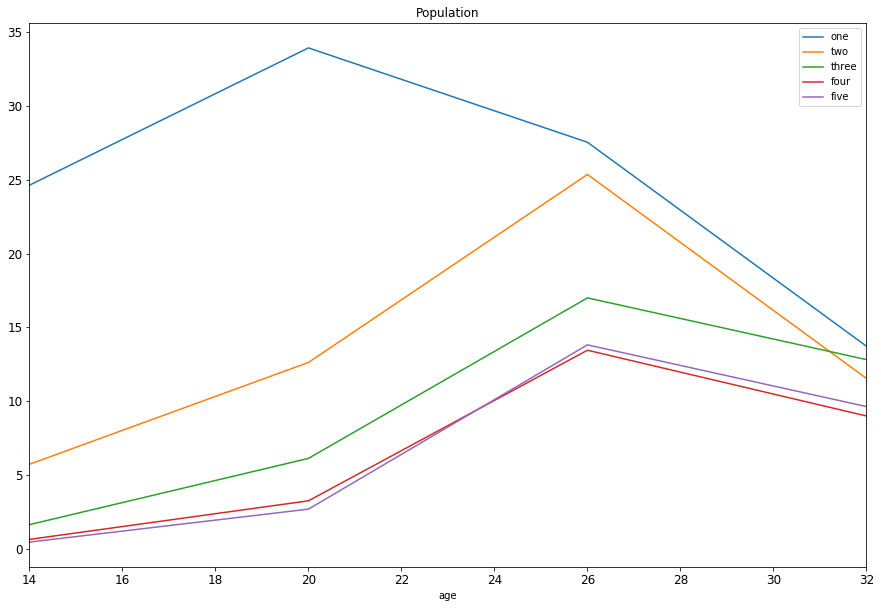

In [4]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population', figsize=(15,10), fontsize=12)
plt.show()

## percentage with one word utterances

In [11]:
df_per = df

In [12]:
df_per['sum'] = df_per.loc[:, 'one':'five'].sum(axis = 1)

In [13]:
df_per.loc[:, "one":"five"] = df_per.loc[:,"one":"five"].div(df_per["sum"], axis=0)

In [14]:
df_per = df_per.drop(['sum'], axis = 1)

In [16]:
df_per.groupby('age').mean()

,one,two,three,four,five
age,,,,,
14,0.744027,0.172756,0.053164,0.016737,0.013315
20,0.609320,0.206120,0.095059,0.049279,0.040222
26,0.304960,0.269536,0.190779,0.118385,0.116339
32,0.263447,0.212869,0.219162,0.158154,0.146367


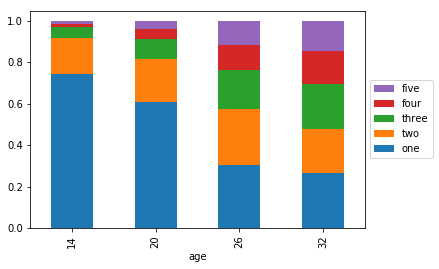

In [8]:
ax = df_per.groupby('age').mean().plot.bar(stacked = True, legend = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## percentage without one word utterances

In [9]:
df_no1 = df.drop('one', axis = 1)

In [10]:
df_no1['sum'] = df_no1.loc[:, 'two':'five'].sum(axis = 1)

In [11]:
df_no1.loc[:, "two":"five"] = df_no1.loc[:,"two":"five"].div(df_no1["sum"], axis=0)

In [12]:
df_no1 = df_no1.drop(['sum'], axis = 1)

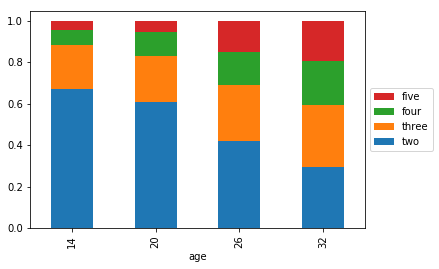

In [13]:
ax = df_no1.groupby('age').mean().plot.bar(stacked = True, legend = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## percentage without three and more word utterances

In [5]:
df_no3 = df.loc[:, 'fname':'two']

In [6]:
df_no3['sum'] = df_no3.loc[:, 'one':'two'].sum(axis = 1)

In [8]:
df_no3.loc[:, "one":"two"] = df_no3.loc[:,"one":"two"].div(df_no3["sum"], axis=0)

In [9]:
df_no3 = df_no3.drop(['sum'], axis = 1)

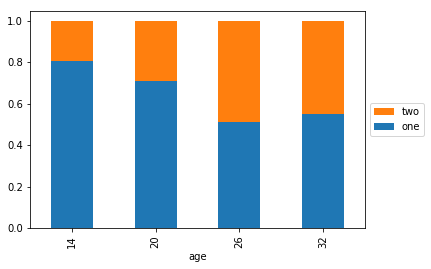

In [10]:
ax = df_no3.groupby('age').mean().plot.bar(stacked = True, legend = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()